In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import lea.data.Data as ldata
import lea.hdf5.h5py_convert as lh5py
import glob

In [3]:
date = '20181029'
datafolder = '/Volumes/Chicago2/JRC_ENS/scan_3d/'+date+'/'
datafile = glob.glob(datafolder+'*.hdf5')[0]
mesurefile = glob.glob(datafolder+'*.hdf5')[1]

In [4]:
from mayavi import mlab

In [ ]:
#generate data files associated to each cines
import lea.hdf5.routine as routine
base = '/media/stephane/DATA/Experimental_data/Turbulence3d'
#'/media/ldupuy/DATA/Experimental_data/Turbulence3d/'
date = '20181029'
datafolder = base+date+'/'
savefolder =base+date+'/'

#generate the data file associated to all cine in the datafolder
routine.convert_arbo(datafolder, savefolder)

In [5]:
#load data hdf5 in a python object
f = lh5py.ouverture_fichier(datafile)
d = lh5py.h5py_in_Data(f)

{'fx': 0.3457, 'Comment': 'Premier test PIV 3D, balayage laser a 90degres de la camera', 'l_in': 35, 'l_out': 52, 'l_c': 43, 'Dlaser': 158.5, 'Dcamera': 94.24, 'Angle': 90, 'x0': 0, 'y0': 70, 'Dcuves': '(75,60,64)', 'flaser': 1000, 'f': 1000.0, 'PIV': '3dscan', 'nikon': '50mm', 'fps': 40000.0, 'A': '0.8V', 'offsetm': '2.8V'}


In [6]:
#load data hdf5 in a python object
f = lh5py.ouverture_fichier(mesurefile)
m = lh5py.h5py_in_Mesure(f)

{'fx': 0.3457, 'Comment': 'Premier test PIV 3D, balayage laser a 90degres de la camera', 'l_in': 35, 'l_out': 52, 'l_c': 43, 'Dlaser': 158.5, 'Dcamera': 94.24, 'Angle': 90, 'x0': 0, 'y0': 70, 'Dcuves': '(75,60,64)', 'flaser': 1000, 'f': 1000.0, 'PIV': '3dscan', 'nikon': '50mm', 'fps': 40000.0, 'A': '0.8V', 'offsetm': '2.8V'}
Are you sure you want to generate a volume object with an already existing m field ?


In [7]:
print(m.Volume.m.keys())
print(m.PIV3D.m.keys())
print(m.Volume.m['instantV'][0][0])

dict_keys(['CV', 'instantV', 'tV'])
dict_keys(['U', 'mean_flow', 'fx', 'fps', 'frame_diff', 'dt_origin'])
19


In [8]:
m.PIV3D.m['U'].shape

(499, 21, 21, 61, 2)

In [8]:
start,end = m.Volume.m['instantV'][0]
#for i,(start,end) in enumerate(m.Volume.m['instantV'])
Utest = m.PIV3D.m['U'][start:end,...]
dimensions = Utest.shape
print(dimensions)

(20, 23, 63, 2)


In [9]:
import numpy as np
Nt = len(m.Volume.m['tV'])
Nz = dimensions[0]+1
U = np.zeros((Nt,)+(Nz,)+dimensions[1:])
for i,(start,end) in enumerate(m.Volume.m['instantV']):
    if end<10000:
        if i%2==1:
            s = start
            start = end
            end = s
        signe = np.sign(end-start)
        U[i,...] = m.PIV3D.m['U'][range(start,end+signe,signe),...]

In [10]:
U = U[:-1,:,1:-1,1:-1,:]

In [56]:
filename = '/media/ldupuy/Chicago2/JRC_ENS/Data/20181010/processed_flowfield.npy'
dataset = np.load(filename)

In [47]:
mean_flow = m.PIV3D.m['mean_flow']#np.nanmean(U,axis=0)

In [11]:
import numpy as np
(Nz,Nx,Ny,Nc) = mean_flow.shape
x = np.arange(-Nx/2,Nx/2,1)
y = np.arange(-Ny/2,Ny/2,1)
z = np.arange(-Nz/2,Nz/2,1)
[X,Z,Y] = np.meshgrid(x,z,y)
print(X.shape)

(21, 21, 61)


In [48]:
mean_flow.shape

(21, 21, 61, 2)

In [49]:
mean_flow = np.transpose(mean_flow,(1,2,0,3))
import numpy as np
(Nx,Ny,Nz,Nc) = mean_flow.shape
x = np.arange(-Nx/2,Nx/2,1)
y = np.arange(-Ny/2,Ny/2,1)
z = np.arange(-Nz/2,Nz/2,1)
[Y,X,Z] = np.meshgrid(y,x,z)
print(X.shape)
print(mean_flow.shape)

(21, 61, 21)
(21, 61, 21, 2)


In [16]:
m.PIV3D.m.keys()

[autoreload of six failed: Traceback (most recent call last):
  File "/home/ldupuy/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/ldupuy/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 384, in superreload
    update_generic(old_obj, new_obj)
  File "/home/ldupuy/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 323, in update_generic
    update(a, b)
  File "/home/ldupuy/.local/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 275, in update_class
    old_obj = getattr(old, key)
  File "/home/ldupuy/.local/lib/python3.6/site-packages/six.py", line 93, in __get__
    setattr(obj, self.name, result)  # Invokes __set__.
AttributeError: 'NoneType' object has no attribute 'cStringIO'
]


dict_keys(['U', 'fx', 'fps', 'frame_diff', 'dt_origin'])

In [20]:
import os.path 

m.PIV3D.m['mean_flow'] = mean_flow
m.PIV3D.m['U'] = U

#change a parameter 
#save the new data in a hdf5 file
f = lh5py.file_name_in_dir(m, os.path.dirname(m.data.fichier)+'/new/')
lh5py.obj_in_h5py(m, f)
f.close()

In [58]:
print(X.shape)
print(mean_flow.shape)

(21, 61, 21)
(21, 61, 21, 2)


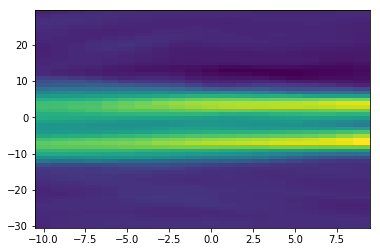

In [61]:
plt.pcolormesh(X[...,0],Y[...,0],mean_flow[...,4,1])

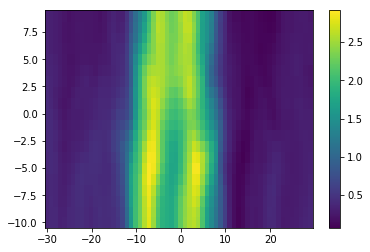

In [134]:
plt.pcolormesh(Y[0,...],Z[0,...],mean_flow[6,...,1])
plt.colorbar()

In [98]:
mean_flow.shape

(21, 61, 21, 2)

-10.5
-6.5
-2.5
1.5
5.5


(0, 20)

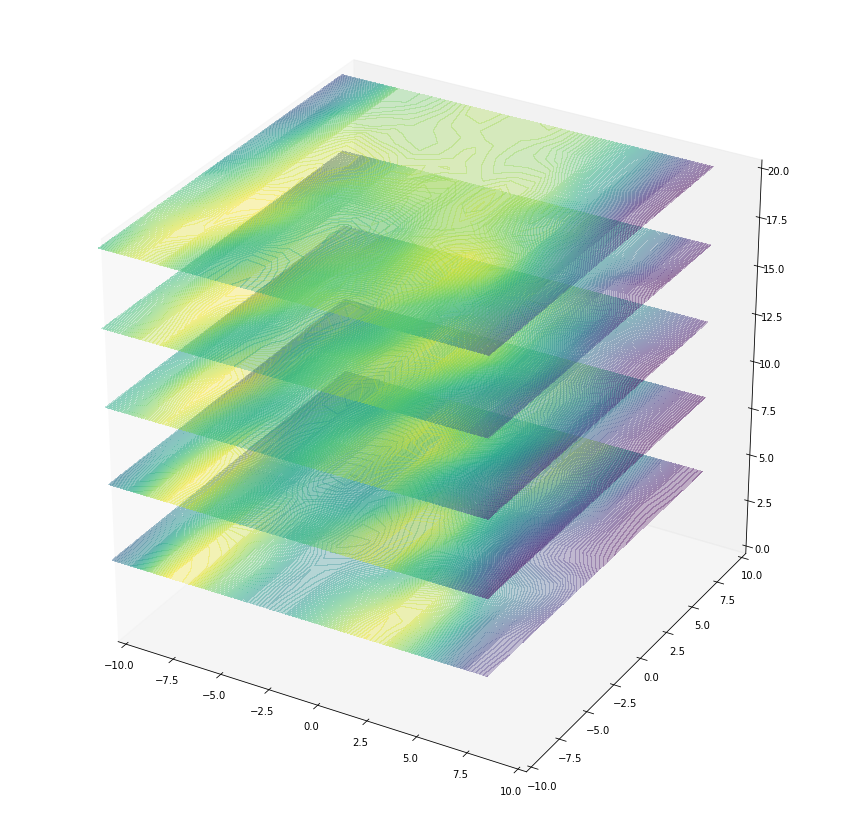

In [158]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

Mean = np.nanmean(mean_flow[0,20:40,...,1])
colors = plt.cm.viridis((mean_flow[20,20:40,...,1]-Mean))
Xmax = np.max(X)
for i in range(0,20,4):
    data = mean_flow[i,20:40,...,1]-Mean
    colors = plt.cm.viridis((mean_flow[i,20:40,...,1]-Mean)*0.8)
    print(X[i,0,0])
    cset = ax.contourf(Y[0,20:40,...],Z[0,20:40,...], data, 100, zdir='z', offset=Xmax-X[i,0,0], cmap=plt.cm.viridis,alpha=0.3)
    #cset = ax.contourf(Y[0,20:40,...],Z[0,20:40,...], data, 100, zdir='z', offset=X[i,0,0], cmap=plt.cm.viridis)

    #ax.plot_surface(Y[0,20:40,...],Z[0,20:40,...], Xmax - X[i,20:40,...],rcount=21,ccount=63, facecolors=colors, linewidth=0, antialiased=True,alpha=0.3)
ax.grid(False)

plt.xlim([-10,10])
plt.ylim([-10,10])
ax.set_zlim(0,20)


In [149]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
X0, Y0, Z0 = axes3d.get_test_data(0.05)
Z0.shape

(120, 120)

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


In [100]:
print(mean_flow.shape)

(21, 61, 21, 2)


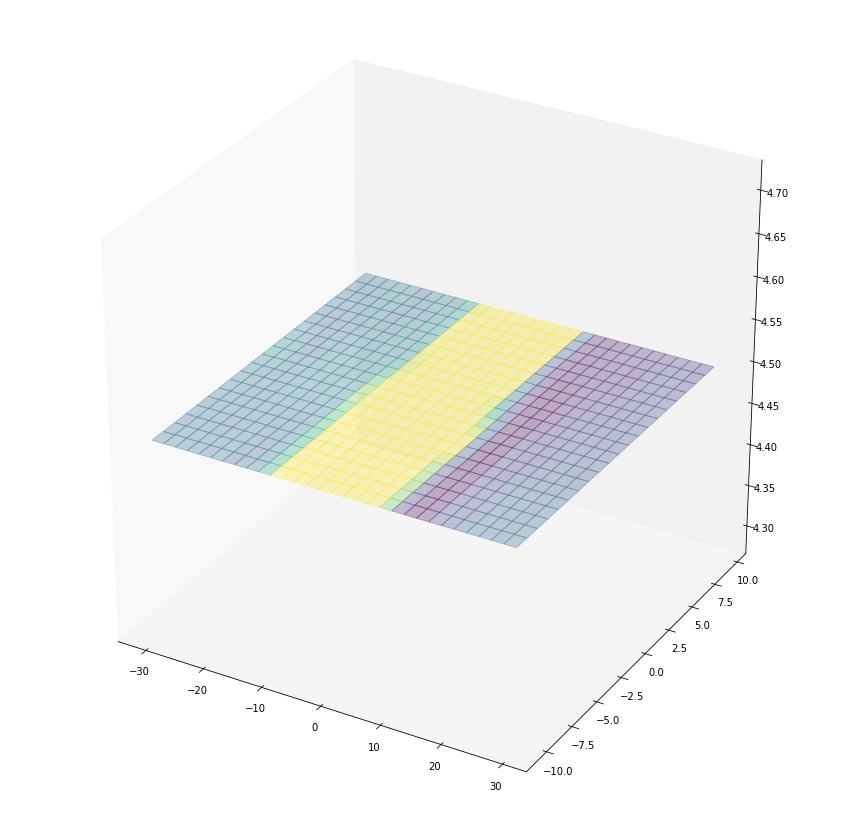

In [101]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

for i in range(15,16,4):
    ax.plot_surface(Y[i,...],Z[i,...], X[i,...], facecolors=plt.cm.viridis(mean_flow[i,...,1]), shade=False,alpha=0.3,vmin=0,vmax=4)
    ax.grid(False)
#fig = plt.figure(figsize=(15,5))
#plt.axis('square')
#ax = fig.gca(projection='3d')

#plt.pcolormesh(X[0,...],Y[0,...],mean_flow[12,...,1])
#ax.plot_surface(np.transpose(Y[:,0,:]),np.transpose(Z[:,0,:]),np.transpose(mean_flow[:,18,:,1]),zs=0)
#ax.pcolormesh(np.transpose(Y[:,0,:]),np.transpose(Z[:,0,:]),np.transpose(mean_flow[:,18,:,1]),vmin = 0,vmax = 3.5)
#plt.colorbar()
#ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
#cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

#ax.set_xlabel('X')
#ax.set_xlim(-40, 40)
#ax.set_ylabel('Y')
#ax.set_ylim(-40, 40)
#ax.set_zlabel('Z')
#ax.set_zlim(-100, 100)

#plt.show()

In [11]:
d.param.__dict__  #access the attributes of d.param

{'fx': 0.3457,
 'Comment': 'Premier test PIV 3D, balayage laser a 90degres de la camera',
 'l_in': 35,
 'l_out': 52,
 'l_c': 43,
 'Dlaser': 158.5,
 'Dcamera': 94.24,
 'Angle': 90,
 'x0': 0,
 'y0': 70,
 'Dcuves': '(75,60,64)',
 'PIV': '3dscan',
 'nikon': '50mm',
 'f': '1000.0Hz',
 'A': '0.8V',
 'offsetm': '2.8V',
 'spec': []}

In [16]:
d.param.f = d.param.f[:-2]

In [21]:
d.param.f = int(float(d.param.f))

In [31]:
d.__dict__.keys()

dict_keys(['im_ref', 'fichier', 'extension', 'size', 'nb_im', 'param', 'id'])

In [5]:
import lea.mesure.Mesure as lmesure
import lea.mesure.Volume_SP as lvolume
import os.path

In [32]:
#change a parameter 
setattr(d.param,'fps',40000)
#save the new data in a hdf5 file
f = lh5py.file_name_in_dir(d, os.path.dirname(d.fichier)+'/new/')
lh5py.obj_in_h5py(d, f)
f.close()

In [22]:
d.param.flaser = d.param.f

In [6]:
d.fichier

'/media/ldupuy/DATA/Experimental_data/Turbulence3d/PIV3dscan_nikon50mm_f1kHz_A800mV_offsetm2800mV_4pumpsOn.cine'

In [17]:
import stephane.cine.cine as cine
c = cine.Cine(d.fichier)

In [20]:
1/(c.get_time(1)-c.get_time(0))

40000.81302387959

In [7]:
m = lmesure.Mesure(d)

In [8]:
import lea.mesure.Piv3D as lpiv3d
piv3 = lpiv3d.Piv3D(d)
m.add_measurement(piv3)

In [12]:
piv3.__dict__

{'data': <lea.data.Data.Data at 0x7f8779853198>,
 'historique': {},
 'm': {},
 'fx': 0.3457,
 'fps': 40000}

In [41]:
piv3.data.nb_im = 440

In [25]:
piv3.load_piv_parameters()

40000
1000


In [26]:
piv3.__dict__

{'data': <lea.data.Data.Data at 0x7f8779853198>,
 'historique': {},
 'm': {},
 'fx': 0.3457,
 'fps': 40000,
 'frame_diff': 40,
 'dt_origin': 0.025}

In [28]:
piv3.data.nb_im = 440 #re set the number of images that will be used for the 3d piv

In [31]:
import time
t1 = time.time()
overlap = 16
window_size = 32

cinefile_truncated = d.fichier.rsplit(".",1)[0]
piv3 = piv3.analysis_multi_proc('', cinefile_truncated, cinefile_truncated, npy=None, fx='toto', dt_origin=None, frame_diff=None, crop_lims=None, maskers=None, window_size=window_size, overlap=overlap, search_area_size=window_size, save=False, s2n_thresh=1.2, bg_n_frames=None)
t2 = time.time()


40000
1000
40
4
10.0
0.1
Algorithm optimal


PicklingError: Can't pickle <class 'lea.mesure.Piv3D.Piv3D'>: it's not the same object as lea.mesure.Piv3D.Piv3D

In [ ]:
v = lvolume.Volume(d)
v = v.volume(nb_im=2040)